<a href="https://colab.research.google.com/github/Epsita-R/Deep-Learning/blob/main/2348517_ETE_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries

import pandas as pd
import numpy as np
import os
import glob as gb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras import layers, callbacks
from keras.layers import *
from keras.models import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.optimizers import RMSprop

In [ ]:
# loading dataset

trainpath = "C:\\Users\\Epsita\\OneDrive\\Desktop\\DL\\Dataset\\lab2cia2\\MY_data\\train"
testpath = "C:\\Users\\Epsita\\OneDrive\\Desktop\\DL\\Dataset\\lab2cia2\\MY_data\\test"
predpath = "C:\\Users\\Epsita\\OneDrive\\Desktop\\DL\\Dataset\\lab2cia2\\MY_data\\predict"

In [ ]:
for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath + "/" + folder + "/*.jpeg"))
    print(f"For training data, found {len(files)} images in folder {folder}")

For training data, found 230 images in folder Apple
For training data, found 230 images in folder avocado
For training data, found 230 images in folder Banana
For training data, found 230 images in folder cherry
For training data, found 230 images in folder kiwi
For training data, found 231 images in folder mango
For training data, found 230 images in folder orange
For training data, found 230 images in folder pinenapple
For training data, found 230 images in folder strawberries
For training data, found 230 images in folder watermelon


In [ ]:
for folder in os.listdir(testpath):
    files = gb.glob(pathname=str(testpath + "/" + folder + "/*.jpeg"))
    print(f"For testing data, found {len(files)} images in folder {folder}")

For testing data, found 89 images in folder apple
For testing data, found 105 images in folder avocado
For testing data, found 106 images in folder banana
For testing data, found 105 images in folder cherry
For testing data, found 105 images in folder kiwi
For testing data, found 105 images in folder mango
For testing data, found 97 images in folder orange
For testing data, found 105 images in folder pinenapple
For testing data, found 103 images in folder stawberries
For testing data, found 105 images in folder watermelon


In [ ]:
files = gb.glob(pathname=str(predpath+"/*.jpeg"))
print(len(files))

48


In [ ]:
classes=sorted(os.listdir(trainpath))
",".join([f"{i}:{c}" for i,c in enumerate(classes)])

'0:Apple,1:Banana,2:avocado,3:cherry,4:kiwi,5:mango,6:orange,7:pinenapple,8:strawberries,9:watermelon'

In [ ]:
# Data augmentation

TRAINING_DIR = trainpath
TESTING_DIR = testpath

train_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        validation_split=0.2
    )


testing_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255
    )

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="training"
)


validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="validation"
)

testing_generator = train_datagen.flow_from_directory(
    TESTING_DIR,
    classes=list(map(lambda x:x.lower().replace("strawberries","stawberries"),classes)),
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical"
)

Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


In [ ]:
# Customized CNN Architecture

model = tf.keras.models.Sequential([
    layers.RandomRotation(0.1, input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomFlip(),
    layers.GaussianNoise(0.03),

    layers.Conv2D(32, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(4),
    layers.Conv2D(64, 3,  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(4),
    layers.Conv2D(128, 4,  activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(4),
    layers.Flatten(),

    #Dense portion, with high dropout rate for high regularization
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8, monitor="val_accuracy", patience=3)
]


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    verbose=1,
                    callbacks=callback_list)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.2819 - loss: 1.7677 - val_accuracy: 0.3391 - val_loss: 1.6120 - learning_rate: 0.0050
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.2758 - loss: 1.6711 - val_accuracy: 0.2935 - val_loss: 1.6332 - learning_rate: 0.0050
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.2918 - loss: 1.6657 - val_accuracy: 0.3239 - val_loss: 1.6206 - learning_rate: 0.0050
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.3044 - loss: 1.7044 - val_accuracy: 0.3370 - val_loss: 1.5906 - learning_rate: 0.0050
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.3201 - loss: 1.6542 - val_accuracy: 0.3109 - val_loss: 1.5672 - learning_rate: 0.0040
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.3129 - loss: 1.6028 - val_accuracy: 0.3152 - val_loss: 1.5944 - learning_rate: 0.0040
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.3252 - loss: 1.6514 - val_accuracy: 

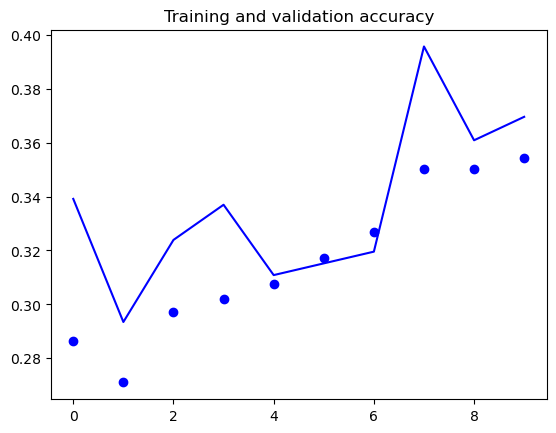

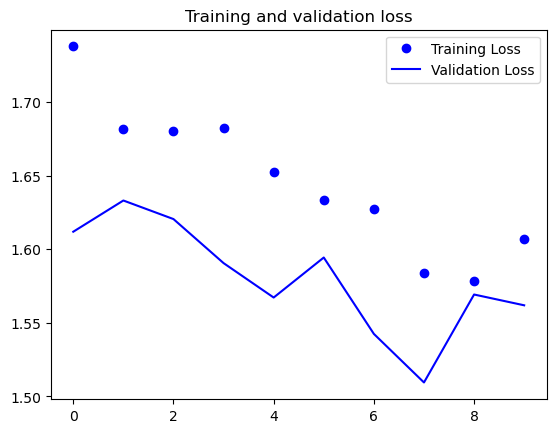

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(testing_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3690 - loss: 1.5458


[1.5668244361877441, 0.3668292760848999]

In [ ]:
model.evaluate(validation_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3954 - loss: 1.4742


[1.5068970918655396, 0.4108695685863495]

In [ ]:
# VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the pre-trained VGG16 model with weights from ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Fine-tune the VGG16 model
base_model.trainable = True

# Set a lower learning rate for fine-tuning
low_learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate=low_learning_rate)

# Create a new model on top of the fine-tuned VGG16 base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
callback_list = [
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.8, monitor="val_accuracy", patience=3)
]

# Print model summary
model.summary()


In [ ]:
# Train the VGG16 model
history_vgg16 = vgg16_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1,
    callbacks=callback_list
)

In [ ]:
acc_vgg16 = history_vgg16.history['accuracy']
val_acc_vgg16 = history_vgg16.history['val_accuracy']
loss_vgg16 = history_vgg16.history['loss']
val_loss_vgg16 = history_vgg16.history['val_loss']

epochs = range(len(acc))

In [ ]:
plt.plot(epochs, acc_vgg16, 'ro', label='VGG16 Training accuracy')
plt.plot(epochs, val_acc_vgg16, 'r', label='VGG16 Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss_vgg16, 'ro', label='VGG16 Training Loss')
plt.plot(epochs, val_loss_vgg16, 'r', label='VGG16 Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
vgg19_model.evaluate(testing_generator)